# Structural reliability analysis

In this notebook we will explore the intricacies of performing structural reliability analysis.

Notebook inspired by

http://www.math.chalmers.se/Stat/Grundutb/CTH/mve300/1112/files/Lecture10/Lecture10.pdf

Safety indexes:

  Cornell safety index
  Hasofer-Lind index

Concepts and examples

https://www.palisade.com/downloads/pdf/EngineeringReliabilityConcepts.pdf

Other reference

http://www.eurocodes.fi/1990/paasivu1990/sahkoinen1990/handbook2%5B1%5D.pdf

Main references

http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

http://www.kstr.lth.se/fileadmin/kstr/pdf_files/STforsk_kurs-10/presentatione_rmm/reliability_analysis10__Kompatibilitetslaege_.pdf

http://web.mae.ufl.edu/nkim/eas6939/RBDO_Class.pdf

http://civile.utcb.ro/ccba/srracourse.pdf

## Computational lab setup

In [1]:
% matplotlib inline

import sys

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl

from scipy.stats import norm
from scipy.integrate import quad
import matplotlib.pyplot as plt

print(sys.version)
for module in (np, sp, pd, mpl):
    print('{:.<15}{}'.format(module.__name__, module.__version__))

3.5.2 |Anaconda 4.3.0 (32-bit)| (default, Jul  2 2016, 17:49:02) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
numpy..........1.11.3
scipy..........0.18.1
pandas.........0.19.2
matplotlib.....2.0.0


## Basic reliability problem

Consider a very simple case where both capacity and demand (measured in terms of action-effects) are represented by independent random variables with a normal distribution.

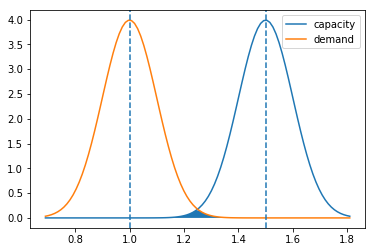

In [2]:
rv_cap = norm(loc=1.5, scale=0.1) # capacity
rv_dem = norm(loc=1.0, scale=0.1) # demand
x = np.linspace(rv_dem.ppf(0.001), rv_cap.ppf(0.999), 100)

fig, ax = plt.subplots()
ax.plot(x, rv_cap.pdf(x), label='capacity')
ax.plot(x, rv_dem.pdf(x), label='demand')
ax.axvline(rv_cap.stats(moments='m'), ls='--')
ax.axvline(rv_dem.stats(moments='m'), ls='--')
ax.fill_between(x, 0., np.minimum(rv_cap.pdf(x),rv_dem.pdf(x)))
plt.legend()
plt.show()

## Failure probability computation

For this simple case there is a closed form solution:

http://www.km.fgg.uni-lj.si/coste24/data/coimbradocuments/coimbra-faber.pdf

See pages 47-48.

In [3]:
miu = rv_cap.mean()-rv_dem.mean()
sigma = np.sqrt(rv_cap.std()**2+rv_dem.std()**2)
print('miu = {:1.6e}, sigma = {:1.6e}'.format(miu, sigma))
beta = miu/sigma
print('beta = {:1.6}'.format(beta))
PF = norm.cdf(-beta) # probability of failure
print('Value = {:1.6e}'.format(PF))

miu = 5.000000e-01, sigma = 1.414214e-01
beta = 3.53553
Value = 2.034760e-04


Numerical computation

First case:

In [4]:
def f1(x):
    """Objective function for numerical quadrature."""
    return rv_dem.pdf(x)*rv_cap.cdf(x)

val, err = quad(f1, rv_dem.ppf(0.001), rv_cap.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


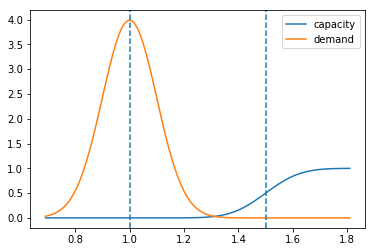

In [5]:
fig, ax = plt.subplots()
ax.plot(x, rv_cap.cdf(x), label='capacity')
ax.plot(x, rv_dem.pdf(x), label='demand')
ax.axvline(rv_cap.stats(moments='m'), ls='--')
ax.axvline(rv_dem.stats(moments='m'), ls='--')
plt.legend(loc='upper right')
plt.show()

Numerical computation

Second case:

In [6]:
def f2(x):
    """Objective function for numerical quadrature."""
    return (1.-rv_dem.cdf(x))*rv_cap.pdf(x)

val, err = quad(f2, rv_dem.ppf(0.001), rv_cap.ppf(0.999))
print('Value = {:1.6e}, error = {:1.6e}'.format(val, err))

Value = 2.034760e-04, error = 1.759145e-09


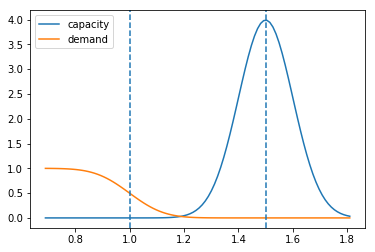

In [7]:
fig, ax = plt.subplots()
ax.plot(x, rv_cap.pdf(x), label='capacity')
ax.plot(x, 1.-rv_dem.cdf(x), label='demand')
ax.axvline(rv_cap.stats(moments='m'), ls='--')
ax.axvline(rv_dem.stats(moments='m'), ls='--')
plt.legend(loc='upper left')
plt.show()

Reliability index